In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# student's t-distribution
From a *student*'s perspective (someone who's taught how to use the t-distribution without knowing how to derive it), the t-distribution is used when:
- population standard deviation $\sigma$ is not known
- $n\leq30$ since we can't say that $n>30 \implies$ X is approximately normal
- generally, if population standard deviation isn't known, it's better to use the t-distribution



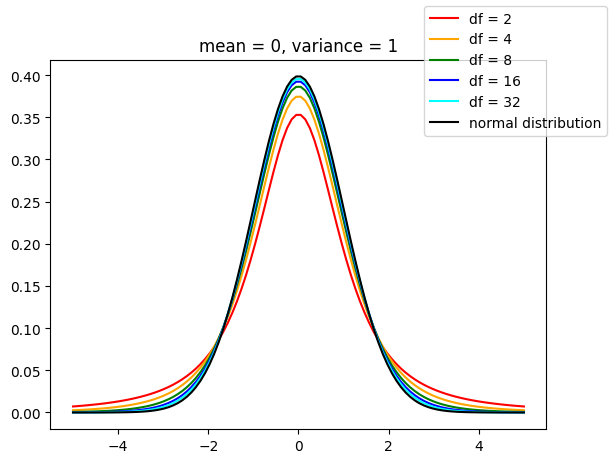

In [3]:
n = 10
mean = 0
var = 1
my_norm_dist = stats.norm(loc=mean, scale=var**0.5)
fig, ax = plt.subplots(nrows=1, ncols=1)
x_values = np.linspace(-5, 5, 100)
ax.set_title(f"mean = {mean}, variance = {var}")
for i in range(1, 6):
    my_t_dist = stats.t(df=2**i,loc=mean,scale=var**0.5)
    ax.plot(x_values, my_t_dist.pdf(x_values), label=f"df = {2**i}", color=['red', 'orange', 'green', 'blue', 'cyan', 'violet'][i-1])
ax.plot(x_values, my_norm_dist.pdf(x_values), label="normal distribution", color='black')
fig.legend()

# Z dist vs T dist
- Testing for estimated sample mean distribution for $n < 30$
- can't use population variance, can't use population mean
- need to use sample variance as parameter
- Assume that $X$ is normally distributed


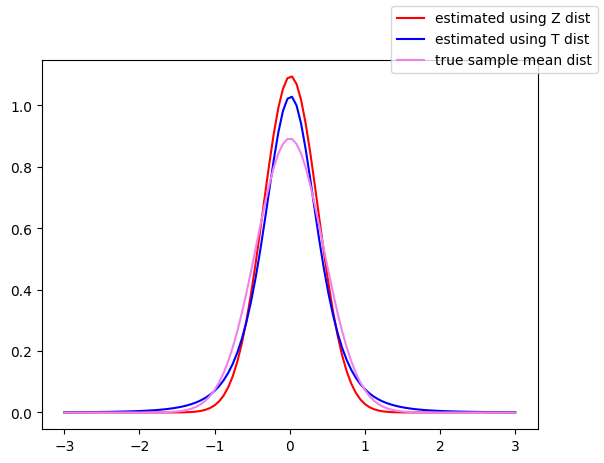

In [16]:
# n for sample size
n = 5
# runs is number of trials run to estimate mean variance, mean of the mean and plot it
runs = 1
var = 1
mean = 0
my_normal_dist = stats.norm(mean, var)
true_sample_mean_dist = stats.norm(mean, var/(n**0.5))
generated_samples = my_norm_dist.rvs(size=(runs, n))
est_sample_mean = np.mean(np.mean(generated_samples, axis=1))
est_sample_var = np.mean(np.var(generated_samples, axis=1, ddof=1))

# the z distribution for sample mean
sample_mean_z = stats.norm(est_sample_mean, (est_sample_var/n)**0.5)


# the t distribution for the sample mean
sample_mean_t = stats.t(loc=est_sample_mean, scale=(est_sample_var/n)**0.5, df= (n-1))

fig, ax = plt.subplots(nrows=1, ncols=1)

x_values = np.linspace(-3, 3, 100)

ax.plot(x_values, sample_mean_z.pdf(x_values), color='red', label="estimated using Z dist")
ax.plot(x_values, sample_mean_t.pdf(x_values), color='blue', label="estimated using T dist")
ax.plot(x_values, true_sample_mean_dist.pdf(x_values), color="violet", label="true sample mean dist")
fig.legend()

# In Conclusion
Literally can't tell the difference... they're all shit estimates bruh...